In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from matplotlib.image import imread

In [2]:
dir_path='C:\\Users\gauta\\MyJupyterProgram\\cell_images\\cell_images'

In [4]:
os.listdir(dir_path)

['test', 'train']

In [5]:
train_path=dir_path+'\\train'
test_path=dir_path+'\\test'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+'\\parasitized')[:5]

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [23]:
p_img=train_path+'\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_164.png'

In [26]:
m_img=imread(p_img)

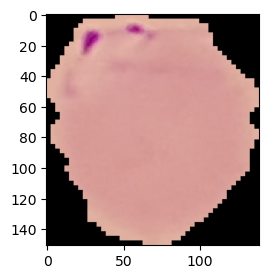

In [28]:
plt.figure(figsize=(3,3))
plt.imshow(m_img)

In [30]:
m_img.shape

(151, 139, 3)

In [34]:
u_img=train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[1]

In [35]:
n_img=imread(u_img)

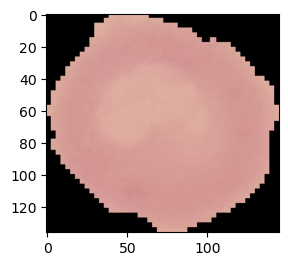

In [37]:
plt.figure(figsize=(3,3))
plt.imshow(n_img)

In [38]:
n_img.shape

(136, 145, 3)

In [48]:
width=[]
hight=[]
for image in os.listdir(train_path+'\\parasitized'):
    img=imread(train_path+'\\parasitized\\'+image)
    w,h,c=img.shape
    width.append(w)
    hight.append(h)

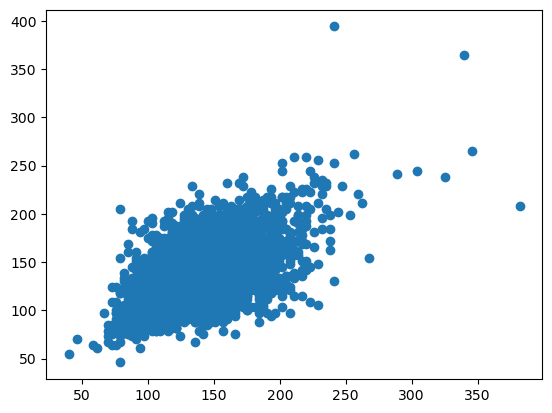

In [49]:
plt.scatter(width,hight)

In [50]:
np.mean(width)

134.360205144643

In [51]:
np.mean(hight)

133.66447632021797

In [52]:
img_dim=(134,134,3)

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
m_img.max()

0.92941177

In [274]:
Image_Generator=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

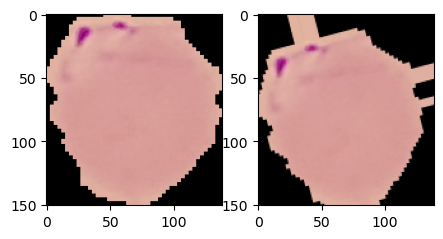

In [78]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(m_img)
plt.subplot(1,2,2)
plt.imshow(Image_Generator.random_transform(m_img))
plt.show()

In [275]:
Image_Generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [276]:
Image_Generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [83]:
#Creating model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout

In [87]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=img_dim, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_dim, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=img_dim, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))# randomly turn off 50% of neurons

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [277]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 132, 132, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 66, 66, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 64)       

In [89]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping=EarlyStopping(monitor='val_loss',patience=2)

In [278]:
train_image_gen=Image_Generator.flow_from_directory(train_path,
                                                    target_size=img_dim[:2],
                                                    color_mode='rgb',
                                                    batch_size=16,
                                                    class_mode='binary')

Found 24958 images belonging to 2 classes.


In [279]:
test_img_gen=Image_Generator.flow_from_directory(test_path,
                                                target_size=img_dim[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [92]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [93]:
train_image_gen.class_mode

'binary'

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [280]:
results=model.fit_generator(train_image_gen, epochs=20, validation_data=test_img_gen, callbacks=[earlystopping])

Epoch 1/20
1560/1560 [==============================] - 210s 135ms/step - loss: 0.6912 - accuracy: 0.5264 - val_loss: 0.6881 - val_accuracy: 0.5585
Epoch 2/20
1560/1560 [==============================] - 180s 115ms/step - loss: 0.4592 - accuracy: 0.7919 - val_loss: 0.2347 - val_accuracy: 0.9273
Epoch 3/20
1560/1560 [==============================] - 181s 116ms/step - loss: 0.2151 - accuracy: 0.9278 - val_loss: 0.2426 - val_accuracy: 0.8638
Epoch 4/20
1560/1560 [==============================] - 186s 119ms/step - loss: 0.2003 - accuracy: 0.9338 - val_loss: 0.2286 - val_accuracy: 0.9265
Epoch 5/20
1560/1560 [==============================] - 186s 120ms/step - loss: 0.1900 - accuracy: 0.9377 - val_loss: 0.1858 - val_accuracy: 0.9281
Epoch 6/20
1560/1560 [==============================] - 192s 123ms/step - loss: 0.1858 - accuracy: 0.9443 - val_loss: 0.1891 - val_accuracy: 0.9354
Epoch 7/20
1560/1560 [==============================] - 195s 125ms/step - loss: 0.1836 - accuracy: 0.9458 - val_

In [97]:
from tensorflow.keras.models import load_model
model.save('Malaria_Detector.h5')

In [281]:
losses=pd.DataFrame(model.history.history)

In [282]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.691193,0.526364,0.688122,0.558462
1,0.459159,0.791850,0.234741,0.927308
2,0.215078,0.927799,0.242607,0.863846
3,0.200301,0.933849,0.228610,0.926538
4,0.189999,0.937655,0.185795,0.928077
5,0.185812,0.944306,0.189106,0.935385
6,0.183643,0.945829,0.172711,0.948077
7,0.172633,0.946150,0.170423,0.944615
8,0.165159,0.950637,0.166934,0.949615
9,0.160212,0.950637,0.164203,0.946923


<AxesSubplot:>

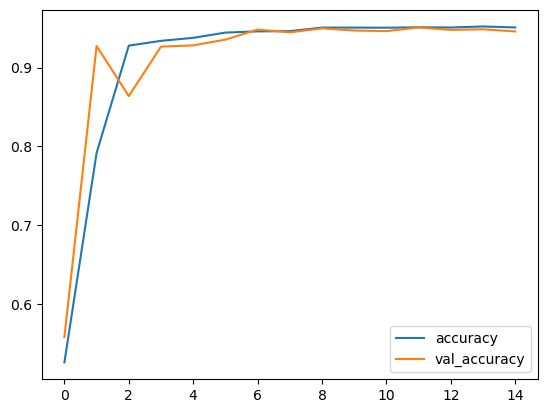

In [283]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

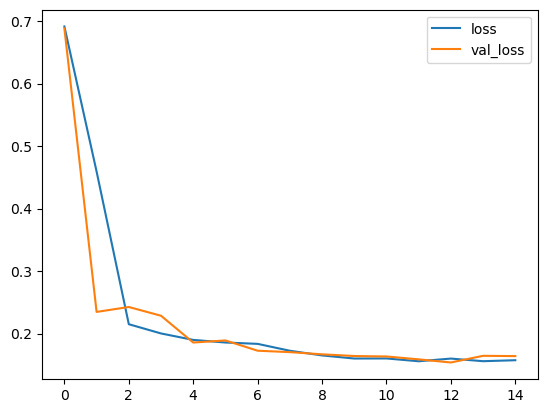

In [285]:
losses[['loss','val_loss']].plot()

In [291]:
print(model.metrics_names)
print(model.evaluate_generator(test_img_gen))

['loss', 'accuracy']
[0.16099298000335693, 0.948846161365509]


In [289]:
pred_probabalities=model.predict_generator(test_img_gen)

In [292]:
predictions=pred_probabalities>0.5

In [294]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [295]:
print(classification_report(test_img_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



<AxesSubplot:>

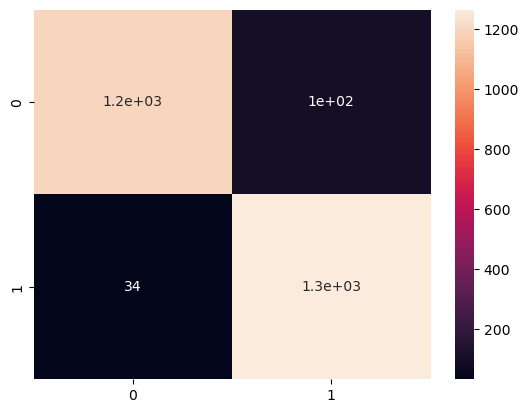

In [296]:
sns.heatmap(confusion_matrix(test_img_gen.classes,predictions),annot=True)

In [322]:
from tensorflow.keras.preprocessing import image

In [335]:
test_img1=test_path+'\\parasitized\\'+os.listdir(test_path+'\\parasitized')[267]
test_img1=image.load_img(test_img1,target_size=img_dim)

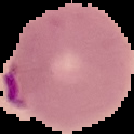

In [336]:
test_img1

In [338]:
test_img1=image.img_to_array(test_img1)

test_img1=np.expand_dims(img,axis=0)

In [339]:
test_img1.shape

(1, 1, 134, 134, 3)

In [351]:
pred=model.predict_generator(test_img1)

In [352]:
pred

array([[0.]], dtype=float32)

In [385]:
test_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}